# Logistic Regression

...

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataframe display first 5 rows
filepath = os.getcwd() + '/logReg_data1.txt'
df = pd.read_csv(filepath, names = ['exam1', 'exam2', 'admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Our training data has two features:  ```exam1``` and ```exam2```, and these features are both continuous variables.   The target variable is called ```admitted```, and this is a categorical variable consisting of the labels 0 or 1 (0 means that the applicant was not admitted and 1 means that the applicant was admitted).  We will use this data to build a model that estimates the probability that an applicant will be admitted to the university, given their scores on the two exams.

### Boxplot

Boxplots give a graphical display of five important statistics associated with any distribution:  the minimum, 25th percentile, median, 75th percentile, and maximum.  They can be very useful for comparing the distributions of continuous variables across different categories.  In this case, we are comparing the distributions of scores for ```exam1``` and ```exam2``` based on whether the applicant was admitted or not.  

The boxplots below show that the distributions of exam scores for applicants who were admitted/not admitted are skewed relative to each other.  We can see that applicants who were admitted to the university have higher exam scores (on average) than those who were not admitted. 

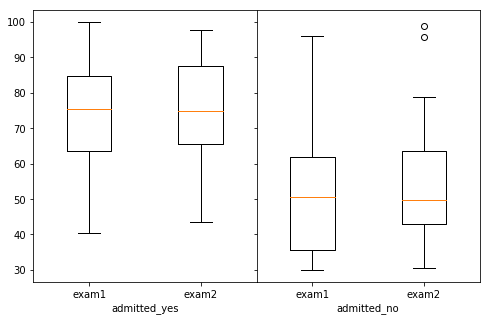

In [70]:
# split the data into 'admitted_yes', 'admitted_no'
admitted_yes = df[ df.admitted == 1 ]
admitted_no = df[ df.admitted == 0 ]
data = [admitted_yes, admitted_no]
xlabels = ['admitted_yes', 'admitted_no']

# make the plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)
fig.subplots_adjust(wspace = 0)
for i in range(0,2):
    ax[i].boxplot( [data[i].exam1, data[i].exam2], widths = [0.4, 0.4] )
    ax[i].set( xticklabels = ['exam1', 'exam2'], xlabel = xlabels[i] )

### Scatterplot

The scatterplot below seems to suggest that if the sum of the exam scores is above a certain threshold, then the applicant will be admitted.  The data can almost be classified by drawing line separating the 'admitted_yes' scores from the 'admitted_no' scores.  This boundary between the two classes is called a **decision boundary

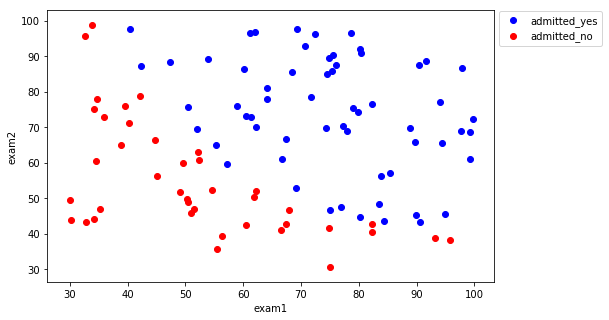

In [98]:
fig, ax = plt.subplots(figsize = (8,5))

plt.scatter(admitted_yes.exam1, admitted_yes.exam2, color = 'blue', label = 'admitted_yes')
plt.scatter(admitted_no.exam1, admitted_no.exam2, color = 'red', label = 'admitted_no')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend(bbox_to_anchor = (1,0.85), loc = 3)# borderaxespad = 0.)
plt.show()